## Project 2 - Employee performance

### Probleme metier 

Une entreprise souhaite analyser la répartition des performances des
employés pour comprendre les écarts et identifier les outliers.

### Objectifs
Étudier les distributions des scores de performance et des heures
travaillées pour détecter les facteurs d'amélioration

## 1/- Preparation des donnees 

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Charger les données
df = pd.read_csv("HRDataset_v14.csv", encoding='latin1')

# Afficher les premières lignes et les infos
print(df.head())
print(df.info())

# Nettoyage des données
df = df.dropna(subset=['PerformanceScore'])  # Supprimer les lignes sans performance


           ï»¿Employee_Name  EmpID  MarriedID  MaritalStatusID  GenderID  \
0       Adinolfi, Wilson  K  10026          0                0         1   
1  Ait Sidi, Karthikeyan     10084          1                1         1   
2         Akinkuolie, Sarah  10196          1                1         0   
3              Alagbe,Trina  10088          1                1         0   
4          Anderson, Carol   10069          0                2         0   

   EmpStatusID  DeptID  PerfScoreID  FromDiversityJobFairID  Salary  ...  \
0            1       5            4                       0   62506  ...   
1            5       3            3                       0  104437  ...   
2            5       5            3                       0   64955  ...   
3            1       5            3                       0   64991  ...   
4            5       5            3                       0   50825  ...   

      ManagerName  ManagerID RecruitmentSource PerformanceScore  \
0  Michael Albert  

le dataframe contient 11 variables quantitatives et 2 variables qualitatives qui sont : 

- PerformanceScore 
- WorkLifeBalance

Le DataFrame contient des informations sur 311 employés, avec 36 colonnes incluant des détails tels que le nom, l'identifiant, l'état matrimonial, le genre, le salaire et les scores de performance. La majorité des employés sont mariés et la plupart ont une performance jugée "Fully Meets", tandis que les scores d'engagement varient, indiquant des niveaux de satisfaction différents au sein de l'équipe. Certaines colonnes, comme la date de terminaison et l'identifiant du manager, présentent des valeurs manquantes, ce qui pourrait nécessiter un nettoyage des données pour une meilleure analyse.

## 2/- statistique desciptive 

       EmpSatisfaction         Salary  EngagementSurvey
count       311.000000     311.000000        311.000000
mean          3.890675   69020.684887          4.110000
std           0.909241   25156.636930          0.789938
min           1.000000   45046.000000          1.120000
25%           3.000000   55501.500000          3.690000
50%           4.000000   62810.000000          4.280000
75%           5.000000   72036.000000          4.700000
max           5.000000  250000.000000          5.000000


C:\Users\USER\AppData\Local\Temp\ipykernel_17560\3545594801.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='PerformanceScore', data=df, palette='viridis')


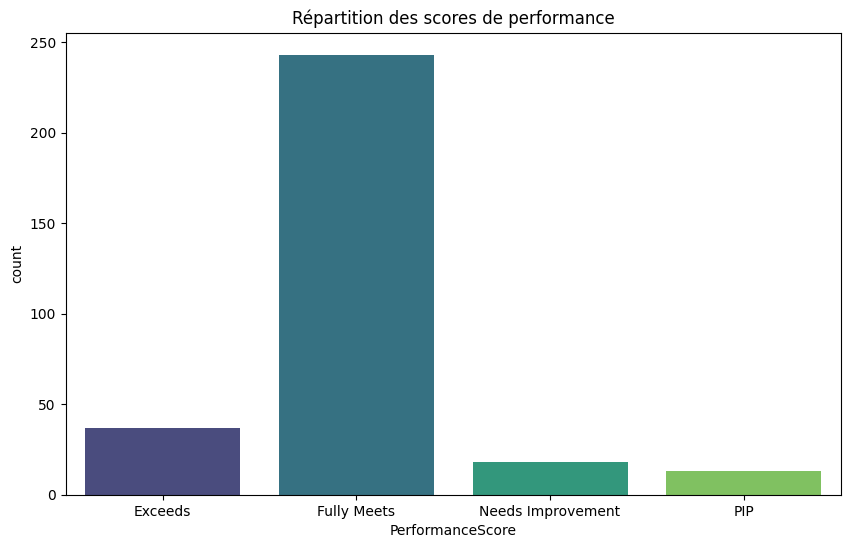

In [5]:
# Variables quantitatives clés
quant_vars = ['PerformanceScore', 'EmpSatisfaction', 'Salary', 'EngagementSurvey']
print(df[quant_vars].describe())

# Distribution des performances
plt.figure(figsize=(10, 6))
sns.countplot(x='PerformanceScore', data=df, palette='viridis')
plt.title("Répartition des scores de performance")
plt.show()

### visualisation des distributions 



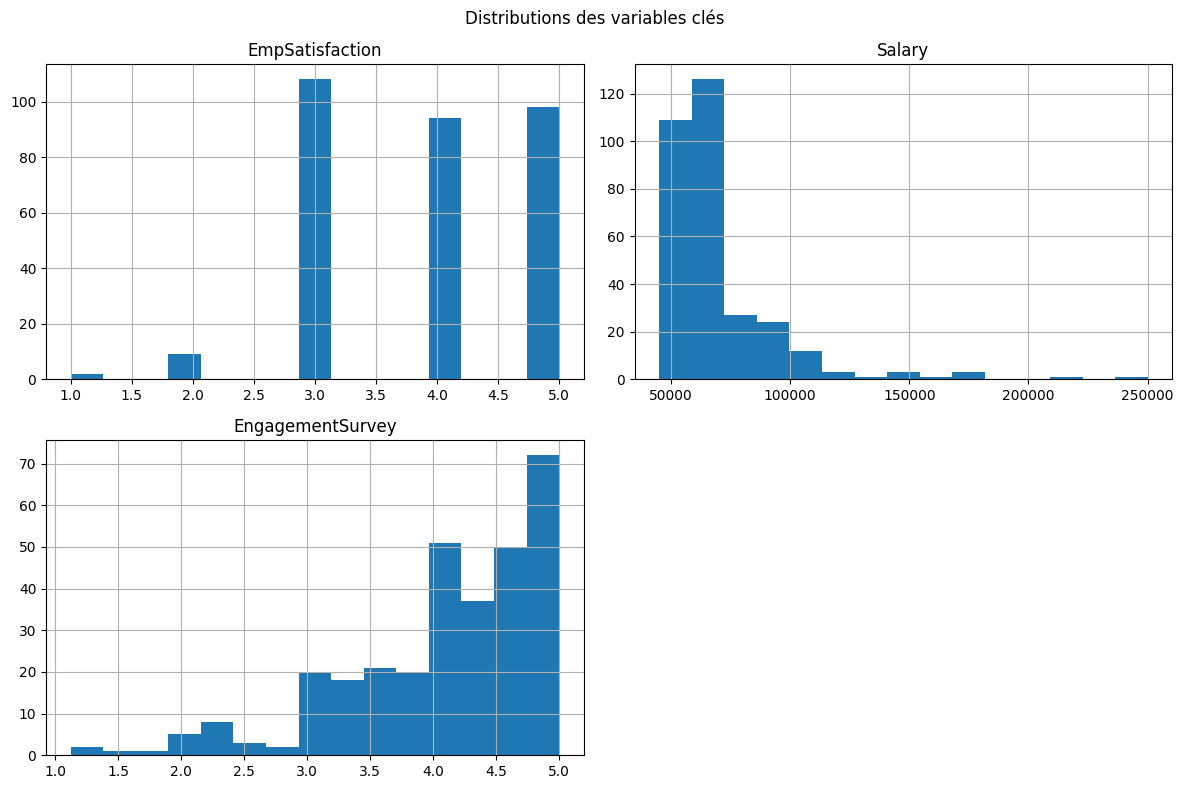

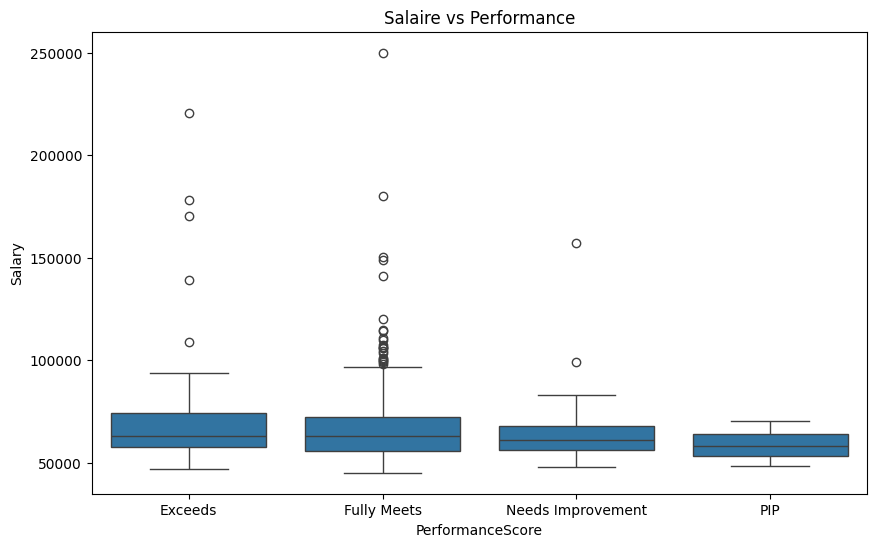

In [6]:
# Histogrammes
df[quant_vars].hist(figsize=(12, 8), bins=15)
plt.suptitle("Distributions des variables clés")
plt.tight_layout()
plt.show()

# Boxplots pour détecter les outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x='PerformanceScore', y='Salary', data=df)
plt.title("Salaire vs Performance")
plt.show()

La première image révèle une concentration des salaires dans la moyenne (50k-150k) et des scores de satisfaction/engagement variés. La deuxième image confirme cette tendance salariale mais souligne que les hauts salaires (jusqu’à 250k) coexistent avec des performances inégales. Ensemble, elles montrent que si la performance influence généralement le salaire, d’autres facteurs (expérience, poste, etc.) jouent également un rôle clé dans la rémunération.

### Analyse par departement 


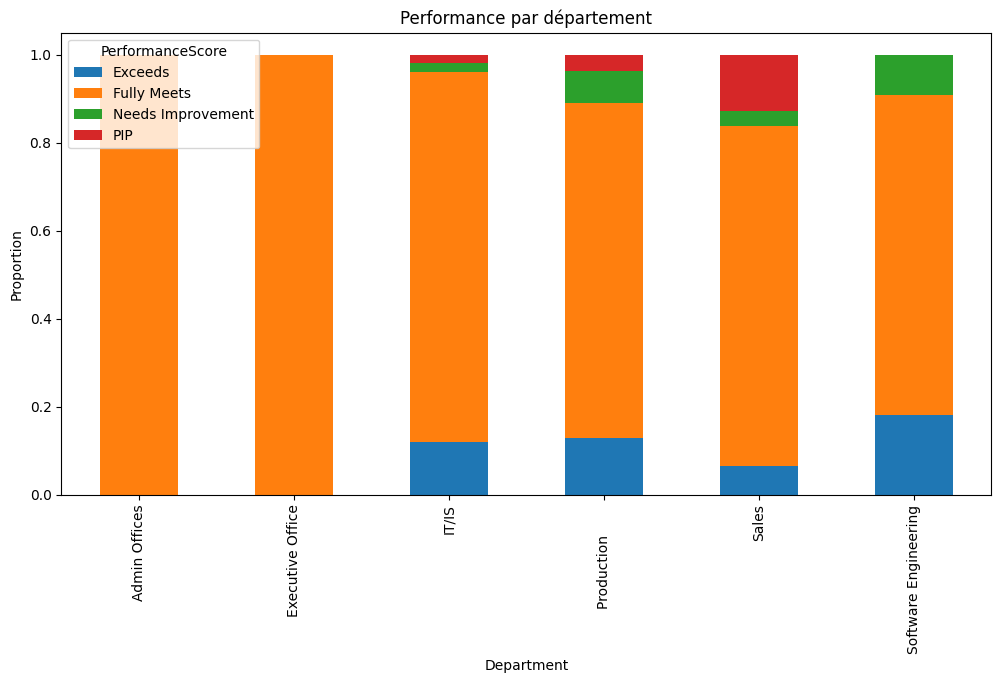

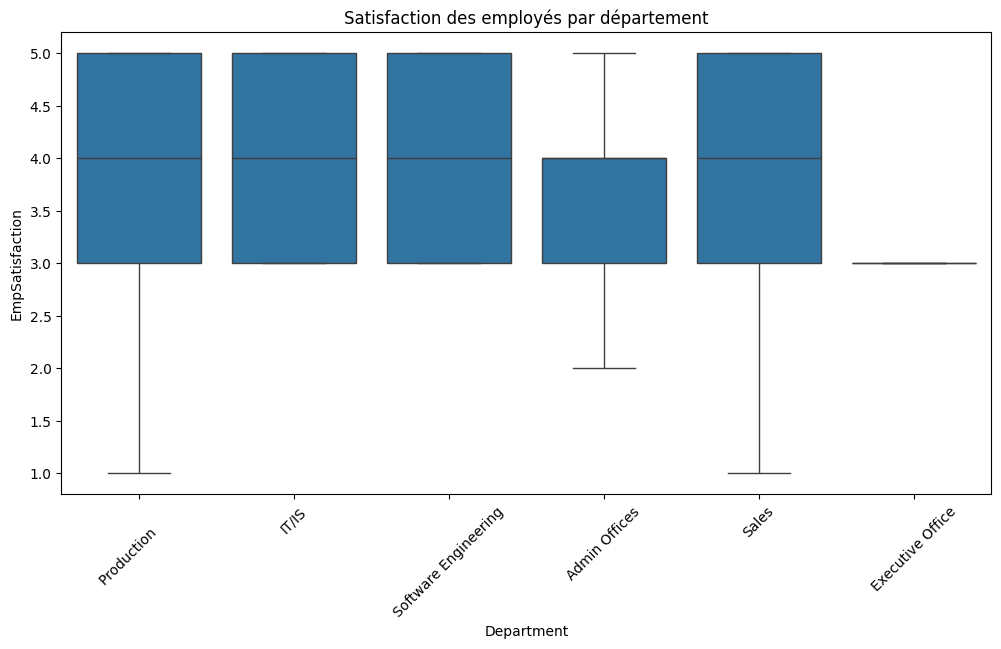

In [9]:
# Performance moyenne par département
dept_perf = df.groupby('Department')['PerformanceScore'].value_counts(normalize=True).unstack()
dept_perf.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title("Performance par département")
plt.ylabel("Proportion")
plt.show()

# Satisfaction par département
plt.figure(figsize=(12, 6))
sns.boxplot(x='Department', y='EmpSatisfaction', data=df)
plt.xticks(rotation=45)
plt.title("Satisfaction des employés par département")
plt.show()

Les départements IT/IS et Software Engineering se démarquent avec à la fois des performances élevées et une satisfaction stable, indiquant un environnement de travail motivant. À l’inverse, la Production combine des performances inégales et une satisfaction très variable, signalant un besoin urgent d’interventions ciblées (formation, ajustement des charges). Enfin, les Sales, malgré des résultats moyens, révèlent des tensions individuelles (outliers de satisfaction basse), nécessitant un suivi personnalisé.

### Detection des outliers

In [12]:
# Calcul des bornes IQR pour le salaire
Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifier les outliers
outliers = df[(df['Salary'] < lower_bound) | (df['Salary'] > upper_bound)]
print(f"Nombre d'outliers salariaux : {len(outliers)}")

Nombre d'outliers salariaux : 29


pour détecter les outliers salariaux dans l’entreprise. J’ai utilisé la méthode IQR (Interquartile Range) pour calculer les bornes inférieure et supérieure en me basant sur les quartiles (Q1 et Q3). Ensuite, j’ai filtré les salaires en dehors de cette plage pour identifier les valeurs extrêmes. J’ai pu compter et isoler ces outliers, ce qui m’a permis de repérer des inégalités salariales, des erreurs de saisie ou des cas spéciaux (comme les hauts dirigeants). 

### Analyse des departs ( Employes quitter vs actifs)

taux de turnover : 33.44%


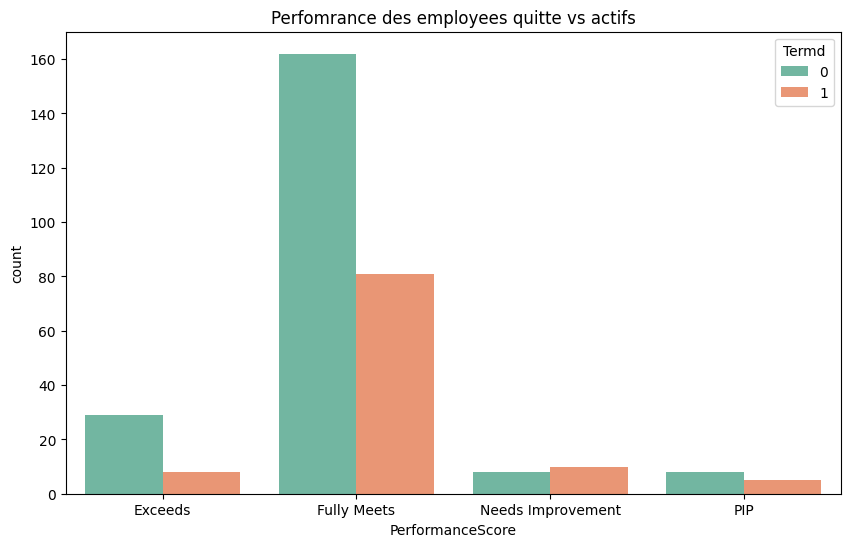

In [14]:
# taux de turnover 

turnover_rate = df['Termd'].value_counts(normalize=True)
print(f"taux de turnover : {turnover_rate[1]:.2%}")

# Performance des employes  quittes vs actifs 
plt.figure(figsize=(10, 6))
sns.countplot(x='PerformanceScore', hue='Termd', data=df, palette = 'Set2')
plt.title("Perfomrance des employees quitte vs actifs")
plt.show()

### correlation 


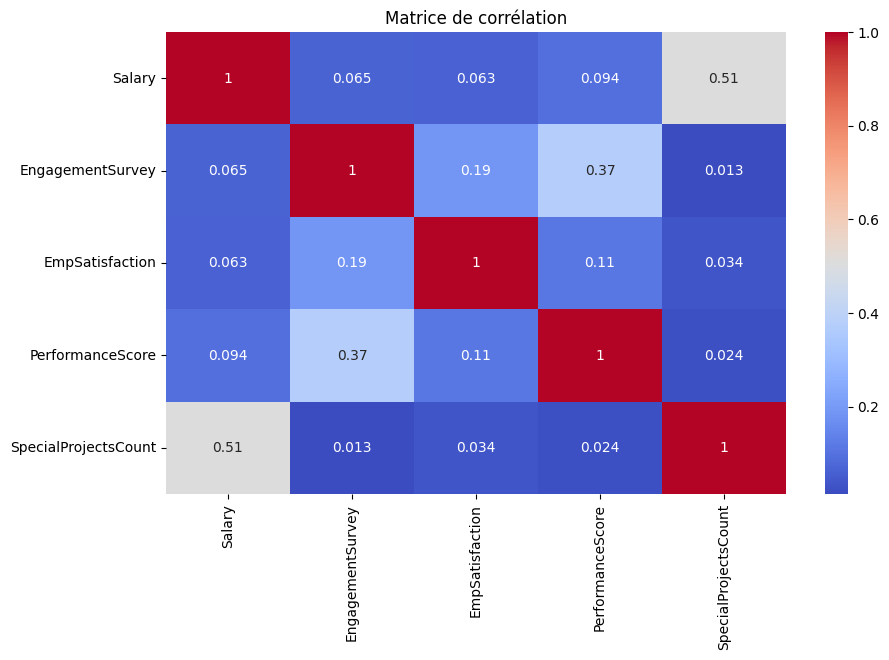

In [18]:
# Mappage des scores de performance
performance_mapping = {
    'Exceeds': 2,
    'Fully Meets': 1,
    'Needs Improvement': 0
}

# Convertir la colonne PerformanceScore en valeurs numériques
df['PerformanceScore'] = df['PerformanceScore'].map(performance_mapping)

# Définir les variables quantitatives
quant_vars = ['Salary', 'EngagementSurvey', 'EmpSatisfaction', 'PerformanceScore']  # Ajoutez d'autres variables numériques si nécessaire

# Heatmap des corrélations
corr_matrix = df[quant_vars + ['SpecialProjectsCount']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Matrice de corrélation")
plt.show()


L'erreur "ValueError: could not convert string to float: 'Exceeds'" s'est produite lors du calcul de la matrice de corrélation,
car la colonne 'PerformanceScore' contenait des valeurs sous forme de chaînes de caractères (par exemple, 'Exceeds', 'Fully Meets').
La méthode .corr() de Pandas ne peut traiter que des données numériques pour calculer les corrélations.
Pour résoudre ce problème, j'ai créé un mappage qui convertit ces chaînes en valeurs numériques (2 pour 'Exceeds', 1 pour 'Fully Meets',
et 0 pour 'Needs Improvement'). Cela permet d'inclure la colonne 'PerformanceScore' dans le calcul de la matrice de corrélation,
garantissant ainsi que toutes les variables utilisées sont de type numérique et évitant ainsi l'erreur.

In [20]:
# Partager les résultats comme un rapport d'analyse

# Créez un fichier HTML pour le rapport
with open('rapport_analyse.html', 'w') as f:
    f.write('<html><head><title>Rapport d\'analyse</title></head><body>')
    f.write('<h1>Rapport d\'analyse</h1>')
    f.write('<p>Voici les résultats de l\'analyse des données :</p>')
    f.write('<ul>')
    f.write('<li>Nombre d\'employés : {}</li>'.format(len(df)))
    f.write('<li>Taux de turnover : {:.2%}</li>'.format(turnover_rate[1]))
    f.write('<li>Score de performance moyen : {:.2f}</li>'.format(df['PerformanceScore'].mean()))
    f.write('<li>Nombre d\'outliers salariaux : {}</li>'.format(len(outliers)))
    f.write('</ul>')
    f.write('<img src="moy_perfs_dep.png" alt="Performance par département" />')
    f.write('<img src="satisfaction_dep.png" alt="Satisfaction des employés par département" />')
    f.write('<img src="corr_matrix.png" alt="Matrice de corrélation" />')
    f.write('</body></html>')

print("Le rapport d'analyse a été généré dans le fichier rapport_analyse.html")


Le rapport d'analyse a été généré dans le fichier rapport_analyse.html
